# Pixar Project
**Based on Dataquest's *Visualizing Pixar's Roller Coaster* guided project.** We will apply data visualisation techniques using Pandas's built-in plotting methods. Let's start by setting up the environment: import the necessary packages and read the data.

## Setting Up the Environment

In [2]:
# Import the packages we need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # We only import Seaborn to make the plots more appealing.
%matplotlib inline

/opt/ds/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Import the data and read it into pixar_movies
pixar_movies = pd.read_csv("PixarMovies.csv")

## Primary Data Exploration

In [4]:
# Display the dimensions of the DataFrame
pixar_movies.shape

(15, 16)

There are only 15 rows and 16 columns, so we can display the whole dataset to explore it.

In [5]:
# Display the whole DataFrame
pixar_movies.head(15)

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3,0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1,0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1,0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3,1
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4,1
5,2004,The Incredibles,115,97,8.0,90,70.47,631.4,261.4,341.28,370.0,41.40%,58.60%,92,4,2
6,2006,Cars,116,74,7.2,73,60.12,462.0,244.1,302.59,217.9,52.84%,47.16%,70,2,0
7,2007,Ratatouille,111,96,8.0,96,47.00,623.7,206.4,243.65,417.3,33.09%,66.91%,150,5,1
8,2008,WALL-E,97,96,8.4,94,63.10,521.3,223.8,253.11,297.5,42.93%,57.07%,180,6,1
9,2009,Up,96,98,8.3,88,68.11,731.3,293.0,318.90,438.3,40.07%,59.93%,175,5,2


In [6]:
# Display the data type for each column
pixar_movies.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

The only surprise here is that both Domestic % and International % are of the *object* type – because of the *%* character. We'll need to remove it if we want to use these columns as *floats* for calculations.

In [7]:
# Display summary statistics for the numeric columns
pixar_movies.describe()

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Production Budget,Oscars Nominated,Oscars Won
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,14.000000
mean,2006.066667,101.533333,89.333333,7.846667,82.800000,67.990667,612.486667,258.506667,318.448000,353.986667,133.400000,2.857143,0.785714
std,5.933761,9.927355,16.451950,0.655599,12.119642,23.270468,190.193934,66.518284,73.321064,135.061615,59.696614,2.032700,0.801784
min,1995.000000,81.000000,39.000000,6.300000,57.000000,29.140000,362.000000,162.800000,194.430000,170.200000,30.000000,0.000000,0.000000
25%,2002.000000,96.000000,85.000000,7.300000,75.000000,58.755000,503.150000,215.100000,261.350000,256.050000,91.000000,1.000000,0.000000
50%,2007.000000,102.000000,96.000000,8.000000,88.000000,66.300000,559.900000,245.900000,318.900000,336.600000,150.000000,3.000000,1.000000
75%,2010.500000,109.000000,98.500000,8.300000,92.000000,76.450000,704.200000,280.750000,361.165000,427.800000,182.500000,4.750000,1.000000
max,2015.000000,116.000000,100.000000,8.800000,96.000000,110.310000,1063.200000,415.000000,457.460000,648.200000,200.000000,6.000000,2.000000


The *Oscars Nominated* and *Oscars Won* columns contain missing values for one row – this is for *Inside Out*, which was still in the movies when the data was compiled (Nov 2015). As such, we shouldn't use this row for any calculations or plots involving revenues or Oscars. It's also worth noticing that all the Score columns are not on the same scale; we'll have to solve this too before we can compare them.

## Data Cleaning
As said above, we'll have two issues to solve with our dataset:
* Some data is missing for *Inside Out*, so we need to remove it from the dataset for certain operations
* We need to normalize the scale of all Score columns
Additionally, we'll set the Movie column as the index and convert the Domestic and International % columns to *floats*.

#### Converting Domestic % and International % to *floats*

In [8]:
# List of the columns we'll work on
cols = ["Domestic %", "International %"]
# For each column
for col in cols:
    # Remove the % sign using the str.strip() method
    pixar_movies[col] = pixar_movies[col].str.rstrip("%")
    # Convert the column to float
    pixar_movies[col] = pixar_movies[col].astype(float)

#### Normalizing all Score columns
We'll really just need to multiply the IMDB Score column by 10.

In [9]:
# Multiply the IMDB Score column by 10
pixar_movies["IMDB Score"] = pixar_movies["IMDB Score"] * 10

#### Removing Missing Values
We'll remove the rows containing missing values (i.e. *Inside Out*).

In [25]:
# Drop the rows containing missing values and assign the new DataFrame to filtered_pixar
filtered_pixar = pixar_movies.dropna()
# Here, this is equivalent to filtered_pixar = pixar_movies.iloc[0:13]

#### Movie as Index

In [11]:
# Set the Movie column as the index for both DataFrames
pixar_movies.set_index("Movie", inplace=True)
filtered_pixar.set_index("Movie", inplace=True)

## Data Visualisation: Line Plots
We want to answer the following question: *How do the Pixar films fare across each of the major review sites?* To do this, we'll generate a line plot for each review site and display them in the same plotting area to facilitate comparisons.

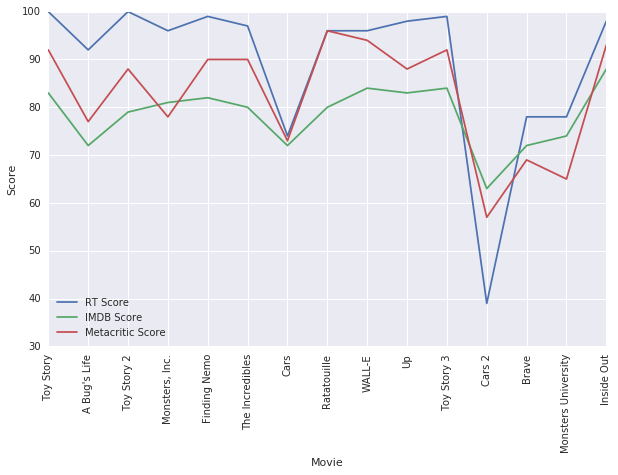

In [12]:
# Create a new DataFrame which contains only the Score columns
critics_reviews = pixar_movies[["RT Score", "IMDB Score", "Metacritic Score"]]

# Generate a line plot for the three columns using Pandas' plot() method
critics_reviews.plot(figsize=(10,6))

# Force all movie titles as xticks
plt.xticks(range(len(critics_reviews.index)), (critics_reviews.index), rotation=90)

# Set the ylabel
plt.ylabel("Score")

# Show the plot
plt.show()

Scores on RT seem to be consistently higher than on IMDB and Metacritic – with the exception of *Cars 2*. This leads us to the next section.

## Data Visualisation: Box Plot
The question we want to answer is as follows: *How are the average ratings from each review site across all the movies distributed?* We'll answer it by using a box plot to get an idea of the Score distribution for each review site.

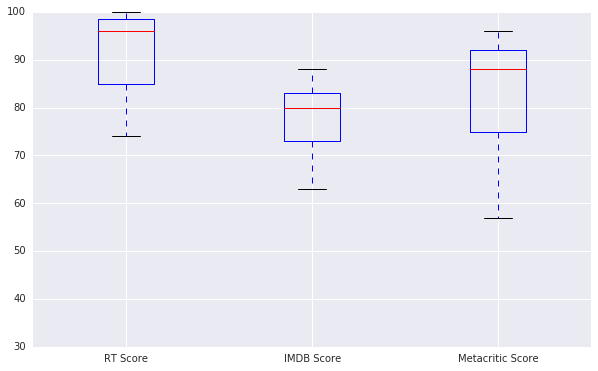

In [13]:
# Create a box plot of the Score for each review site
critics_reviews.plot(kind="box", figsize=(10,6))

It turns out that RT Scores for Pixar movies are effectively higher than on both other sites. It's also noteworthy that ratings on Metacritic tend to sprend across a larger range (from below 60 to above 95).

## Data Visualisation: Stacked Bar Plot
Let's now turn to the revenue distribution. We'll use a stacked bar plot to compare the domestic vs international revenue proportion of each movie. Since the movies are ordered chronologically, this will give us an idea of the evolution of this distribution over the years. *Reminder: Inside Out* should be discarded for this part of the analysis, as the data regarding its revenue is not yet final.

In [14]:
# Create a new DataFrame, revenue_proportions, containing only the columns we're interested in
revenue_proportions = filtered_pixar[["Domestic %", "International %"]]

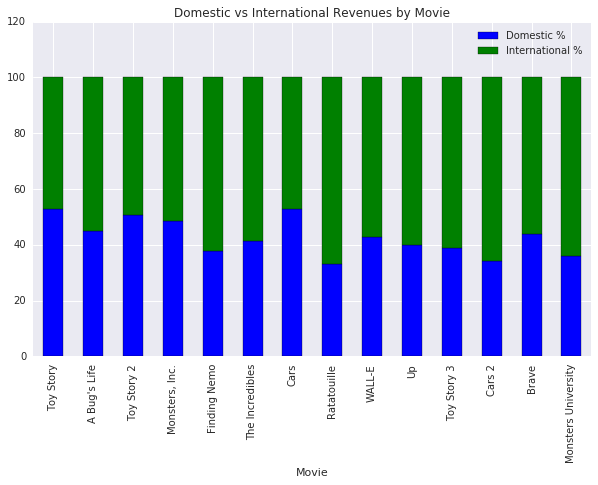

In [28]:
# Generate a stacked bar plot based on this new DataFrame
revenue_proportions.plot(kind="bar", stacked=True, figsize=(10,6))

# Set the title of the plot
plt.title("Domestic vs International Revenues by Movie")

plt.show()

It seems that international revenues are increasingly important, ranging from ~45% for *Toy Story* to ~60% for *Monsters University*. Let's check this idea by plotting the evolution of both proportions.

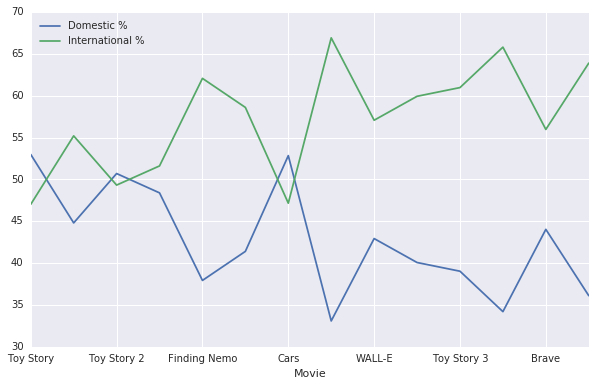

In [16]:
# Generate a line plot of International %
revenue_proportions.plot(figsize=(10,6))

Indeed, it seems that international revenues represent a higher part of total revenues than they used to.

## Data Visualisation: Scatter Plot
Let's explore the relationship between a movie's production budget and its success (defined as (1) average ratings; (2) total revenues).
### (1) Production Budget and Average Ratings

/opt/ds/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


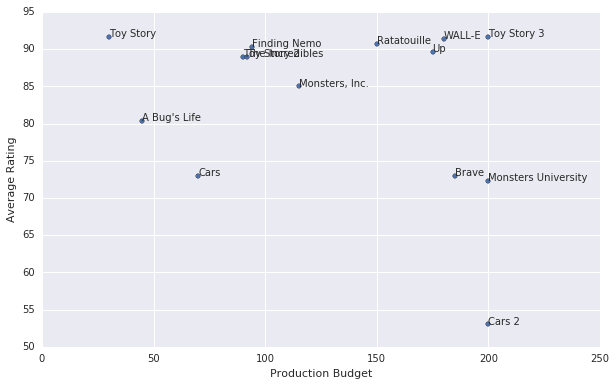

In [50]:
# Create a new column which contains the average rating for each movie
filtered_pixar["Average Rating"] = (filtered_pixar["RT Score"] + filtered_pixar["IMDB Score"] + filtered_pixar["Metacritic Score"]) / 3

# Generate a scatter plot representing the Average Rating as a function of the Production Budget
filtered_pixar.plot.scatter("Production Budget", "Average Rating", figsize=(10,6))

# Annotate each point with the corresponding movie title
for i, xy in enumerate(zip(filtered_pixar["Production Budget"], filtered_pixar["Average Rating"])):
    plt.annotate(filtered_pixar.index[i], xy)

plt.show()

If one considers Cars 2 (the lowest point in terms of average rating) to be an outlier, there is no obvious relationship between production budget and average rating.
### (2) Production Budget and Worldwide Gross

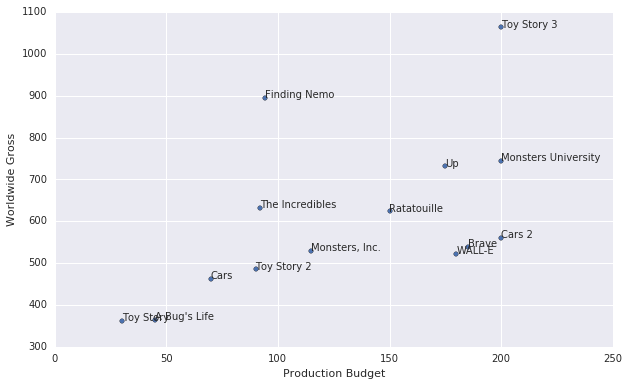

In [52]:
# Generate a scatter plot representing the Worldwide Gross as a function of the Production Budget
filtered_pixar.plot.scatter("Production Budget", "Worldwide Gross", figsize=(10,6))

# Annotate each point with the corresponding movie title
for i, xy in enumerate(zip(filtered_pixar["Production Budget"], filtered_pixar["Worldwide Gross"])):
    plt.annotate(filtered_pixar.index[i], xy)
    
plt.show()

There seems to be a positive correlation between a movie's production budget and its worlwide gross.

## Next Steps
Below are some ideas which could be explored next:
* Create a grouped bar plot to explore if there's any correlation between the number of Oscars a movie was nominated for and the number it actually won. *(from Dataquest)*
* What plots can you generate to better understand which columns correlate with the Adjusted Domestic Gross revenue column, which describes the total domestic revenue adjusted for economic and ticket price inflation? *(from Dataquest)*
* Are review site ratings correlated to revenues?